# Aprendizagem - Homework II
### II. Programming - Grupo99
(ist1106059, ist1106329)

1- 

In [91]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

df = pd.read_csv('heart-disease.csv')

# separar features do target
x = df.drop(columns=['target'])
y = df['target']

# inicializar 5-fold stratified cross-validation com shuffling
strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# inicializar modelos kNN e naive Bayes
kNN = KNeighborsClassifier(n_neighbors=5)
naive_bayes = GaussianNB()

# aplicar o 5-fold stratified cross-validation com shuffling aos 2 modelos
kNN_accuracies = cross_val_score(kNN, x, y, cv=strat_k_fold, scoring='accuracy')
naive_bayes_accuracies = cross_val_score(naive_bayes, x, y, cv=strat_k_fold, scoring='accuracy')


a)

Ao analisar o boxplot abaixo, vemos que o modelo Naive Bayes apresentou uma precisão significativamente maior em comparação com o kNN, sendo a sua mediana das precisões próxima de 0.83 em comparação com 0.67 do kNN.

Adicionalmente, o modelo Naive Bayes aparenta ser mais estável já que tem uma menor dispersão dos dados no boxplot (caixa menor e intervalos interquartis mais pequenos), o que indica que a variação das precisões de cada fold é relativamente baixa. O kNN, por outro lado, apresenta uma variação maior nestas precisões, o que indica menos estabilidade.

Estes resultados podem dever-se ao facto de o kNN ser sensível à escala das variáveis, já que calcula distâncias para fazer previsões (ou seja, features como a idade, com intervalos de valores grandes, vão ter maior influência nos resultados e torná-lo menos preciso e estável), ao contrário do modelo Naive Bayes que, por ser um classificador probabilístico com suposições simples (independência condicional entre as features e distribuição Gaussiana para todas as variáveis), consegue manter uma performance mais estável mesmo com dados que não estejam perfeitamente normalizados ou escalados.


Mediana das precisões do modelo kNN: 0.6721
Mediana das precisões do modelo Naive Bayes: 0.8333


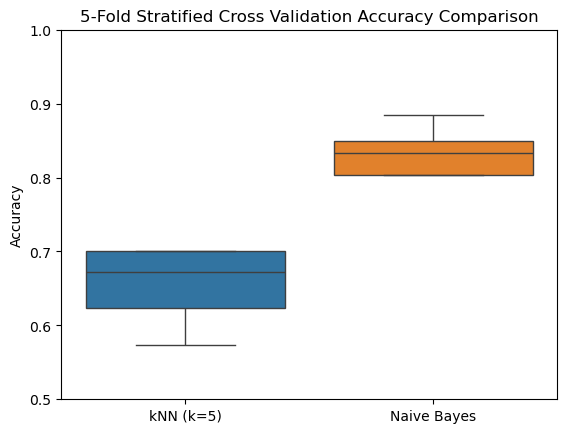

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print(f"Mediana das precisões do modelo kNN: {np.median(kNN_accuracies):.4f}")
print(f"Mediana das precisões do modelo Naive Bayes: {np.median(naive_bayes_accuracies):.4f}")

sns.boxplot(data=[kNN_accuracies, naive_bayes_accuracies])
plt.xticks([0, 1], ['kNN (k=5)', 'Naive Bayes'])
plt.ylim(0.5, 1)
plt.title('5-Fold Stratified Cross Validation Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

b)

Comparando os resultados do modelo kNN antes e depois de fazer Min-Max Scaling, conseguimos perceber que este modelo beneficiou bastante deste escalonamento dos dados.

Primeiramente, a precisão melhorou bastante, já que a média das 5-folds está próxima de 0.82 e a mediana é agora 0.83(3), igual à do modelo Naive Bayes. 

Para além disso, a variação da precisão também reduziu, pois os intervalos interquartis estão menores (até menores que do modelo Naive Bayes), significando que a estabilidade do modelo também aumentou considerávelmente. Isto faz todo o sentido uma vez que, se os dados estiverem escalados e normalizados, features com magnitudes muito elevadas já não vão ter um impacto tão grande no cálculo das distâncias necessário para classificar os dados com o modelo kNN.

Quanto ao modelo Naive Bayes, vemos que o boxplot manteve-se inalterado, não mostrando nenhuma variação nas precisões dos 5-folds. Isto já era de esperar pois, como foi dito na questão anterior, o modelo Naive Bayes assume uma distribuição Gaussiana para as features e por isso, não é sensível ao escalonamento. Isto porque o Min-Max scaling apenas altera os intervalos de valores que as features podem tomar, mantendo as distribuição das mesmas.

Precisão média do modelo kNN: 0.8217
Precisão média do modelo Naive Bayes: 0.8350

Mediana das precisões do modelo kNN: 0.8333
Mediana das precisões do modelo Naive Bayes: 0.8333


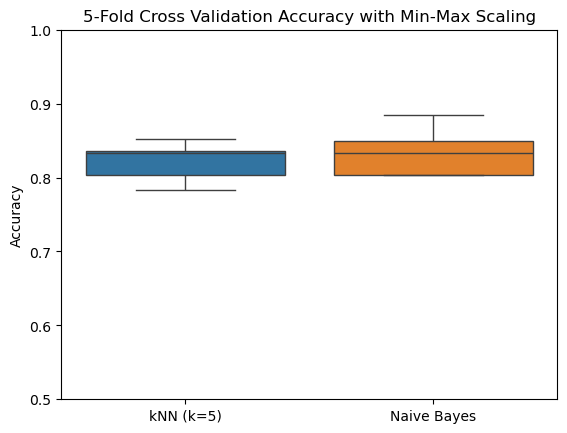

In [93]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

kNN_accuracies_minmax = cross_val_score(kNN, x_scaled, y, cv=strat_k_fold, scoring='accuracy')
naive_bayes_accuracies_minmax = cross_val_score(naive_bayes, x_scaled, y, cv=strat_k_fold, scoring='accuracy')

# calcular médias das precisões
print(f"Precisão média do modelo kNN: {np.mean(kNN_accuracies_minmax):.4f}")
print(f"Precisão média do modelo Naive Bayes: {np.mean(naive_bayes_accuracies_minmax):.4f}")

# calcular mediana das precisões
print(f"\nMediana das precisões do modelo kNN: {np.median(kNN_accuracies_minmax):.4f}")
print(f"Mediana das precisões do modelo Naive Bayes: {np.median(naive_bayes_accuracies_minmax):.4f}")

sns.boxplot(data=[kNN_accuracies_minmax, naive_bayes_accuracies_minmax])
plt.xticks([0, 1], ['kNN (k=5)', 'Naive Bayes'])
plt.ylim(0.5, 1)
plt.title('5-Fold Cross Validation Accuracy with Min-Max Scaling')
plt.ylabel('Accuracy')
plt.show()

c)

Para testar a hipótese de que "o modelo kNN é estatísticamente superior ao Naive Bayes no que toca à precisão", realizamos um t_test, antes e depois de aplicar o min-max scaler, obtendo um p-value de 0.9987 e 0.7463, respetivamente. 

Como em ambos os casos o p-value é maior que os valores habituais dos níveis de significâncias (neste caso 5%), rejeitamos a hipótese em questão, ou seja, a afirmação apresentada não é verdadeira.

In [94]:
from scipy.stats import ttest_rel

# Realizar o teste t
stat, p_value = ttest_rel(kNN_accuracies_minmax, naive_bayes_accuracies_minmax, alternative='greater')
stat_minmax, p_value_minmax = ttest_rel(kNN_accuracies, naive_bayes_accuracies, alternative='greater')

# Imprimir o resultado do p-value
print(f'Estatística t antes do Min-Max: {stat:.4f}')
print(f'p-value antes do Min-Max: {p_value:.4f}')

print(f'\nEstatística t depois do Min-Max: {stat_minmax:.4f}')
print(f'p-value depois do Min-Max: {p_value_minmax:.4f}')

# Nível de significância
alpha = 0.05

if p_value >= alpha:
    print("\n(antes do Min-Max) Rejeitamos a hipótese")
else:
    print("\n(antes do Min-Max) Não rejeitamos a hipótese")

if p_value_minmax >= alpha:
    print("\n(depois do Min-Max) Rejeitamos a hipótese")
else:
    print("\n(depois do Min-Max) Não rejeitamos a hipótese")

Estatística t antes do Min-Max: -0.7271
p-value antes do Min-Max: 0.7463

Estatística t depois do Min-Max: -6.6903
p-value depois do Min-Max: 0.9987

(antes do Min-Max) Rejeitamos a hipótese

(depois do Min-Max) Rejeitamos a hipótese


2.

a)

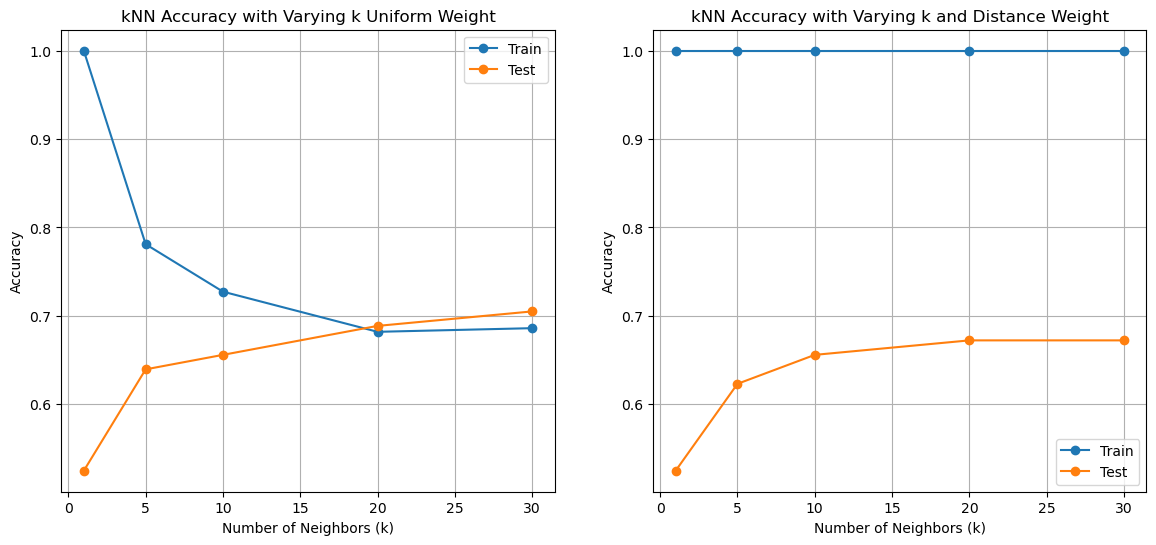

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Dividir em conjunto de treino e teste (80-20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

k_values = [1, 5, 10, 20, 30]

train_accuracy_uniform = []
test_accuracy_uniform = []
train_accuracy_distance = []
test_accuracy_distance = []

# Treinar o kNN para cada valor de k
for k in k_values:
    # pesos uniformes
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_uniform.fit(x_train, y_train)
    train_accuracy_uniform.append(knn_uniform.score(x_train, y_train))
    test_accuracy_uniform.append(knn_uniform.score(x_test, y_test))
    
    # pesos por distância
    knn_distance = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_distance.fit(x_train, y_train)
    train_accuracy_distance.append(knn_distance.score(x_train, y_train))
    test_accuracy_distance.append(knn_distance.score(x_test, y_test))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, train_accuracy_uniform, label='Train', marker='o')
plt.plot(k_values, test_accuracy_uniform, label='Test', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('kNN Accuracy with Varying k Uniform Weight')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, train_accuracy_distance, label='Train', marker='o')
plt.plot(k_values, test_accuracy_distance, label='Test', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('kNN Accuracy with Varying k and Distance Weight')
plt.legend()
plt.grid(True)

plt.show()


b)

Aumentar o k num modelo kNN geralmente melhora a capacidade de generalização do mesmo. Isto pode ser explicado pois, para valores pequenos de k, o modelo ajusta-se demasiado aos dados de treino porque toma a decisão com base no(s) vizinho(s) mais próximo(s), mesmo que estes sejam outliers. Ou seja, temos overfitting porque este desempenho não se refletiria nos dados de teste. Por sua vez, para valores demasiado grandes de k, vai considerar vizinhos muito distantes e aos quais não tem relação. Torna-se um classificador muito simples e com underfitting. O ideal é encontrar um equilíbrio, de maneira que, o modelo considere um número de observações suficientemente grande para evitar capturar o ruído dos dados, mas não demasiado grande para não ter underfitting.

Quanto aos gráficos obtidos, comecemos por comentar a precisão do kNN para pesos uniformes (que classifica com base nos k vizinhos mais próximos sem dar prioridade a nenhum vizinho em particular, quer esteja mais perto ou mais longe):
- quando o k=1, a precisão do modelo para os dados de treino é 1 e para os dados de teste é perto de 0.5. Temos então um claro caso de overfitting e uma capacidade de generalização fraca devido ao que foi referido acima.
- à medida que o k aumenta (de 1 para 20), o modelo vai-se equilibrando e a sua capacidade de generalização aumenta (temos uma diminuição da precisão dos dados de teste e um aumento na precisão nos dados de treino).
- a partir de k=20, a precisão do modelo mantêm-se praticamente estável, com a precisão dos dados de treino a aumentar.

Podemos então ver que, para pesos uniformes, o aumento do k afeta o modelo como esperado, aumentando a generalização do mesmo (até um certo valor que, ainda que não tenha acontecido neste gráfico, espera-se que seja o caso).

No que toca à precisão do kNN, para pesos baseados na distância, temos um comportamento bastante diferente. Isto é facilmente observado no gráfico para os dados de treino que se mantém constante (com precisão = 1). A diferença é que, quando usamos pesos baseados nas distâncias, estamos a considerar os k vizinhos mais próximos, mas a dar mais importância aos mais próximos desses k. Ou seja, mesmo que aumentemos o k e, por isso, consideremos mais vizinhos, vamos dar sempre mais peso aos que estão mais próximos, o que faz com que o aumento do k não tenha tanto impacto neste modelo como no kNN com pesos uniformes. Outra maneira de ver isto é que, para os dados de teste, ainda que haja um aumento na precisão como no gráfico para pesos uniformes, este mantém-se constante a partir de k=20, significando que aumentar o k a partir daí não tem qualquer impacto na performance do modelo.

Podemos então concluir que o aumento do k, no geral, melhora a generalização do modelo kNN, sendo mais impactante no modelo que usa pesos uniformes do que no de pesos baseados na distância.



3.

O modelo Naive Bayes apresenta duas dificuldades na aprendizagem do data set dado. 

Primeiramente, o Naive Bayes assume que todas as variáveis são independentes umas das outras. Sendo o data set relacionado com “casos reais”, mais concretamente, doenças de coração e as possíveis causas, é muito plausível afirmar que estas causas estão muitas vezes correlacionadas, o que afeta bastante a precisão e desempenho do modelo.
Aliás, conseguimos confirmar este dado com o código apresentado abaixo que demonstra que de facto, existe correlação entre algumass features dadas.

Adicionalmente, o modelo Naive Bayes é melhor usado quando trabalhamos com features categóricas, o que no data set dado não é sempre o caso. Muitas variáveis como idade, nível de colesterol, ritmo cardíaco, entre outras, são variáveis contínuas. Para criar um modelo Naive Bayes que também aprenda data sets com variáveis contínuas, é comum supor que estas variáveis seguem uma distribuição Normal ou Gaussiana. Como é óbvio, esta suposição nem sempre é acertada, muito menos no contexto deste data set, o que pode fazer com que o modelo apresente dificuldades na aprendizagem do mesmo. Para além disso, este data set específico tem algumas variáveis categóricas que, por serem representadas por valores numéricos (por ex. por serem binárias), não são ignoradas nesta suposição da distribuição, o que também afeta os resultados. 


In [86]:
print(f"Correlação entre age e trestbps: {df['age'].corr(df['trestbps'])}")
print(f"Correlação entre age e chol: {df['age'].corr(df['chol'])}")
print(f"Correlação entre exang e oldpeak: {df['exang'].corr(df['oldpeak'])}")
print("...")


Correlação entre age e trestbps: 0.2793509065612883
Correlação entre age e chol: 0.2136779565595618
Correlação entre exang e oldpeak: 0.28822280778276543
...
